In [1]:
import missingno as msno
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\swiif\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### 1. EDA
* Prepare DF
* Preview the data 
* Check for missing fields
* Check for duplicates

In [2]:
df = pd.read_csv('../data/clickbait_title_classification.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      32000 non-null  object
 1   clickbait  32000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 500.1+ KB


In [3]:
df.head()

,title,clickbait
0,""".asia"" domain applications near 300,000 on op...",0
1,"""1 Indian + 1 Indian = Unrelatable"": Televisio...",1
2,"""7th Heaven"" television series comes to an end",0
3,"""Arm Glow"" Is Your New Life Goal, Thanks To Lu...",1
4,"""Beans Memes"" Is The Only Twitter Account That...",1


In [4]:
if df.isnull().values.any():
    print(f"There are {df.isna().sum()} missing values in the dataset.")
    msno.matrix(df)
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


In [5]:
if df.duplicated().any():
    print(f"There are {df.duplicated().sum()} duplicate rows in the dataset.")#
    df = df.drop_duplicates()
else:
    print("No duplicate rows found in the dataset.")

No duplicate rows found in the dataset.


<Figure size 800x500 with 0 Axes>

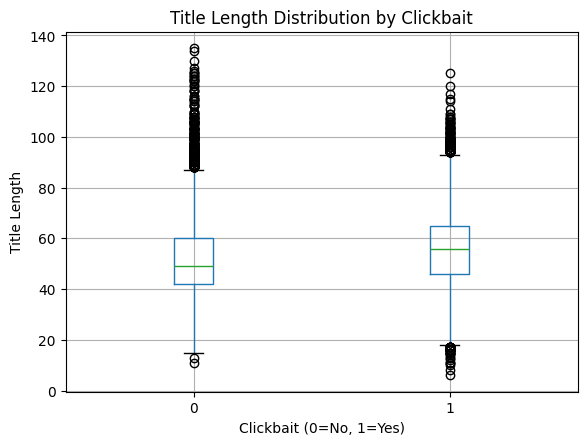

In [6]:
if 'title_length' not in df.columns:
	df['title_length'] = df['title'].str.len()

plt.figure(figsize=(8, 5))
df.boxplot(column='title_length', by='clickbait')
plt.xlabel('Clickbait (0=No, 1=Yes)')
plt.ylabel('Title Length')
plt.title('Title Length Distribution by Clickbait')
plt.suptitle('')
plt.show()

Interesting there are some really short titles.

In [7]:
df[df['title_length'] < 17]

,title,clickbait,title_length
5778,33 Bad Puns,1,11
6507,9 Period Hacks,1,14
6539,9 Times I Cried,1,15
7873,Are Emojis Words,1,16
7931,Are You Dead,1,12
8788,BFWKND,1,6
9780,COCK BLOCK,1,10
11510,DIY Sugar Wax,1,13
11985,Do You Have ESP,1,15
14408,Goys Try Latkes,1,15


In [8]:
df[df['title_length'] > 120]

,title,clickbait,title_length
8673,Australian rules football: West Gippsland Latr...,0,126
9866,"Cambridge, Mass., city council recommends cons...",0,127
10617,Catholic Democrats tell Chicago Cardinal Georg...,0,125
10664,"Champaign, Illinois mayor doubts Obama's natur...",0,123
11156,Common Sense Advisory announces size of worldw...,0,135
12574,England; Australia set to battle for right to ...,0,124
18301,Liberal Democrats defeated in UK elections aft...,0,130
20763,Opposition motions in Australian House of Repr...,0,125
20969,Palestinian security forces clash with militan...,0,122
24516,Teen charged with seven felonies related to th...,0,125


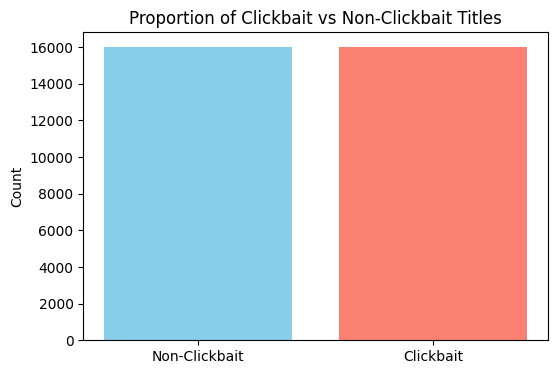

In [9]:
clickbait_counts = df['clickbait'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(['Non-Clickbait', 'Clickbait'], clickbait_counts, color=['skyblue', 'salmon'])
plt.ylabel('Count')
plt.title('Proportion of Clickbait vs Non-Clickbait Titles')
plt.show()

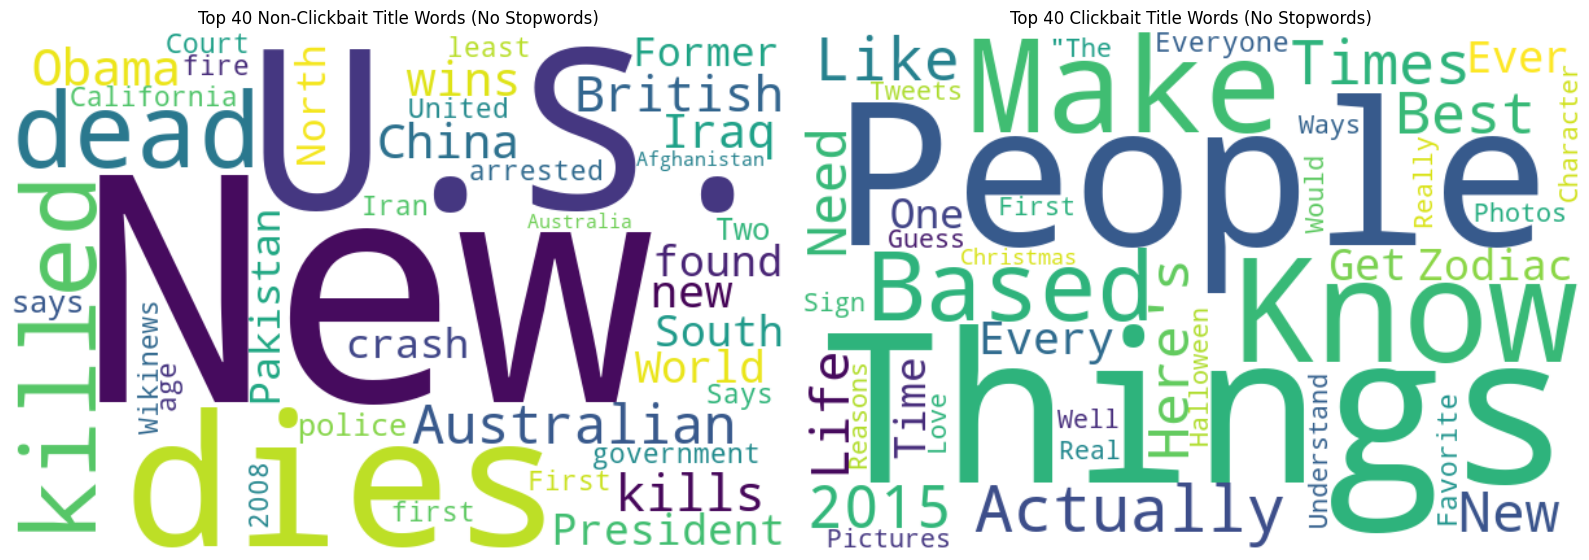

In [10]:
top_n = 40  # Change this value for more or fewer words

stop_words = set(stopwords.words('english'))

non_clickbait_titles = ' '.join(df[df['clickbait'] == 0]['title'])
words_non = [word for word in non_clickbait_titles.split() if len(word) > 2 and word.lower() not in stop_words]
wordcloud_non = WordCloud(width=600, height=400, background_color='white', max_words=top_n).generate_from_frequencies(Counter(words_non))

clickbait_titles = ' '.join(df[df['clickbait'] == 1]['title'])
words_click = [word for word in clickbait_titles.split() if len(word) > 2 and word.lower() not in stop_words]
wordcloud_click = WordCloud(width=600, height=400, background_color='white', max_words=top_n).generate_from_frequencies(Counter(words_click))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].imshow(wordcloud_non, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title(f'Top {top_n} Non-Clickbait Title Words (No Stopwords)')
axes[1].imshow(wordcloud_click, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title(f'Top {top_n} Clickbait Title Words (No Stopwords)')
plt.tight_layout()
plt.show()

#### 2. Data Engeneering

##### Length of the Title

count    32000.000000
mean        53.804063
std         14.774600
min          6.000000
25%         44.000000
50%         52.000000
75%         63.000000
max        135.000000
Name: title_length, dtype: float64

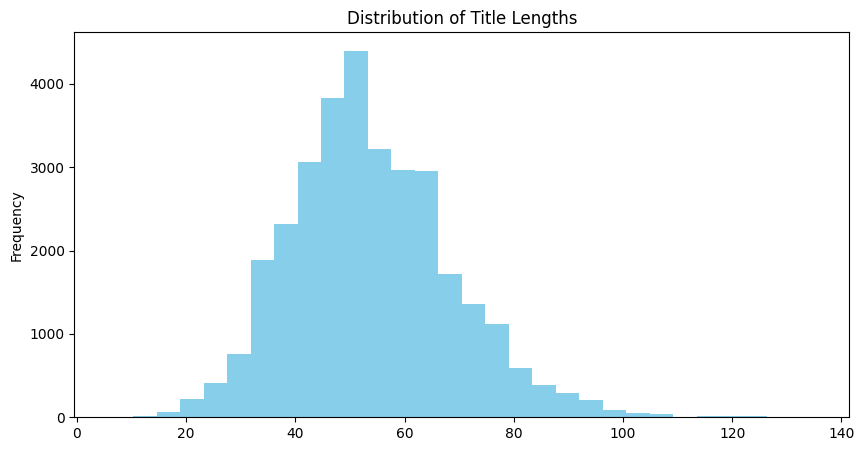

In [11]:
if 'title_length' not in df.columns:
	df['title_length'] = df['title'].str.len()


df['title_length'].plot(kind='hist', bins=30, figsize=(10, 5), color='skyblue', title='Distribution of Title Lengths')
df['title_length'].describe()


##### Number of Words in The Title

count    32000.000000
mean         9.065156
std          2.603603
min          1.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         26.000000
Name: title_world_count, dtype: float64

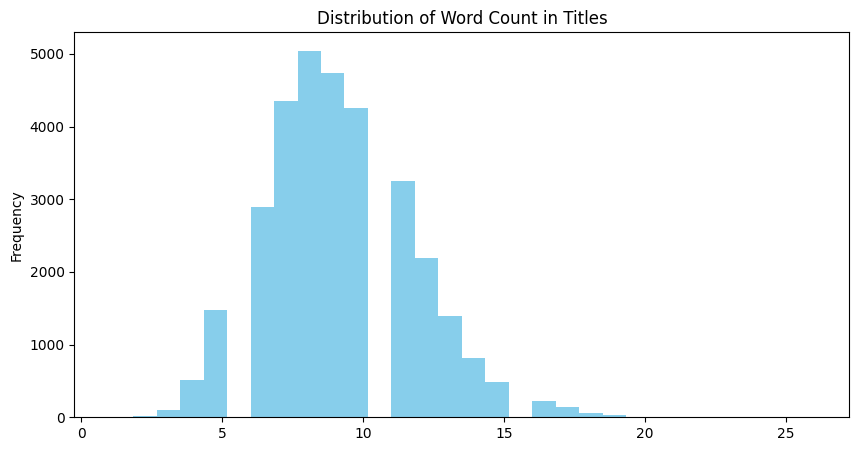

In [12]:
if 'title_world_count' not in df.columns:
    df['title_world_count'] = df['title'].str.split().apply(len)
    
df['title_world_count'].plot(kind='hist', bins=30, figsize=(10, 5), color='skyblue', title='Distribution of Word Count in Titles')
df['title_world_count'].describe()

##### Number Of Uppercase Worlds in Title

count    32000.000000
mean         7.159656
std          3.681163
min          0.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         30.000000
Name: title_uppercase_count, dtype: float64

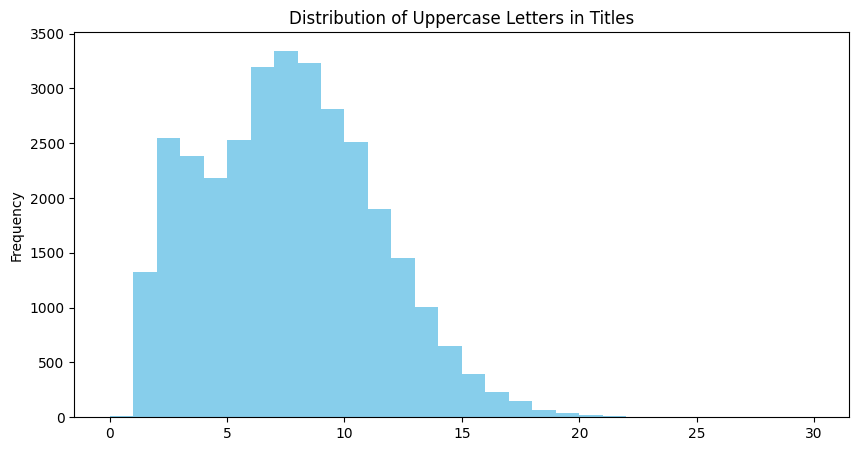

In [13]:
if 'title_uppercase_count' not in df.columns:
    df['title_uppercase_count'] = df['title'].apply(lambda x: sum(1 for c in x if c.isupper()))
    
df['title_uppercase_count'].plot(bins=30, figsize=(10, 5), kind='hist', color='skyblue', title='Distribution of Uppercase Letters in Titles')
df['title_uppercase_count'].describe()

##### Number of Special Characters

count    32000.000000
mean         0.744750
std          1.053687
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         10.000000
Name: number_of_special_characters, dtype: float64

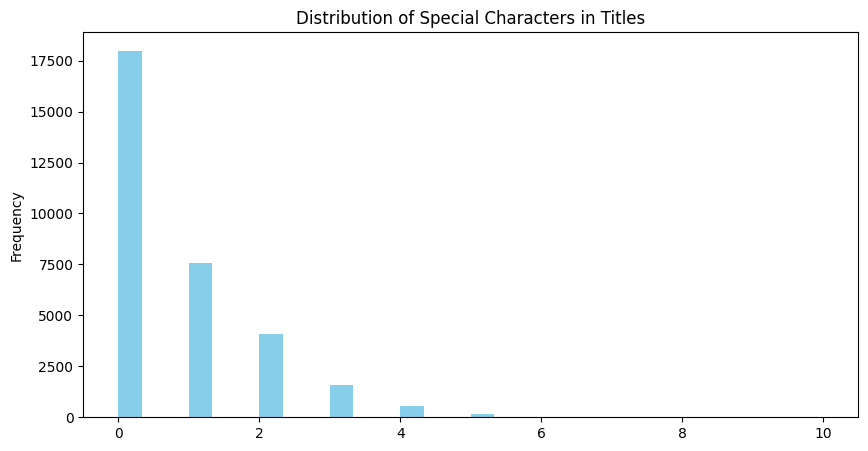

In [14]:
if 'number_of_special_characters' not in df.columns:
    df['number_of_special_characters'] = df['title'].apply(lambda x: sum(1 for c in x if not c.isalnum() and not c.isspace()))
    
df['number_of_special_characters'].plot(kind='hist', bins=30, figsize=(10, 5), color='skyblue', title='Distribution of Special Characters in Titles')
df['number_of_special_characters'].describe()

##### Has Numbers in the title

In [46]:
df['digit_count'] = df['title'].apply(lambda x: sum(1 for c in x if c.isdigit()))
print(df['digit_count'].value_counts().sort_index())

digit_count
0     21962
1       975
2      6766
3       487
4       968
5       159
6       589
7        33
8        44
9         7
10        9
16        1
Name: count, dtype: int64


count     32000
unique        2
top       False
freq      21962
Name: has_number, dtype: object

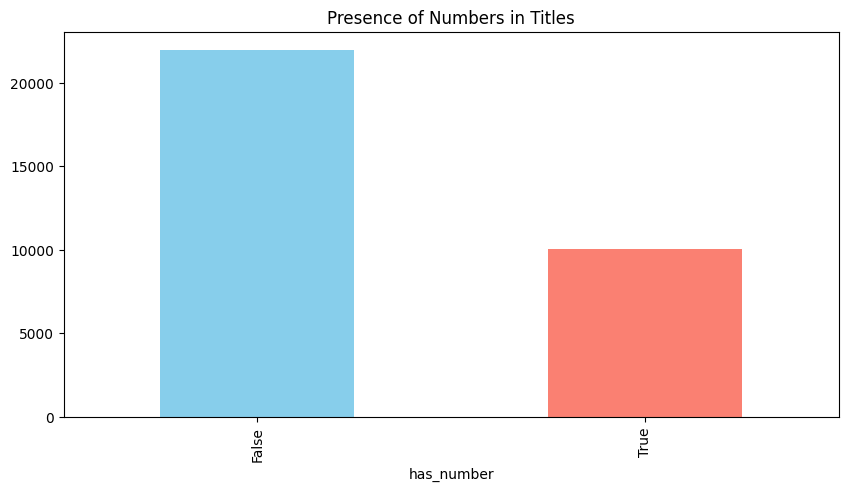

In [39]:
if 'has_number' not in df.columns:
    df['has_number'] = df['title'].str.contains(r'\d', na=False)
    
df['has_number'].value_counts().plot(kind='bar', figsize=(10, 5), color=['skyblue', 'salmon'], title='Presence of Numbers in Titles')
df['has_number'].describe()

##### Uppercase Lowercase Ratio (Not Useful For This Dataset)

count    32000.000000
mean         0.160905
std          0.114880
min          0.000000
25%          0.097561
50%          0.173913
75%          0.212766
max         10.500000
Name: upper_lower_ratio, dtype: float64

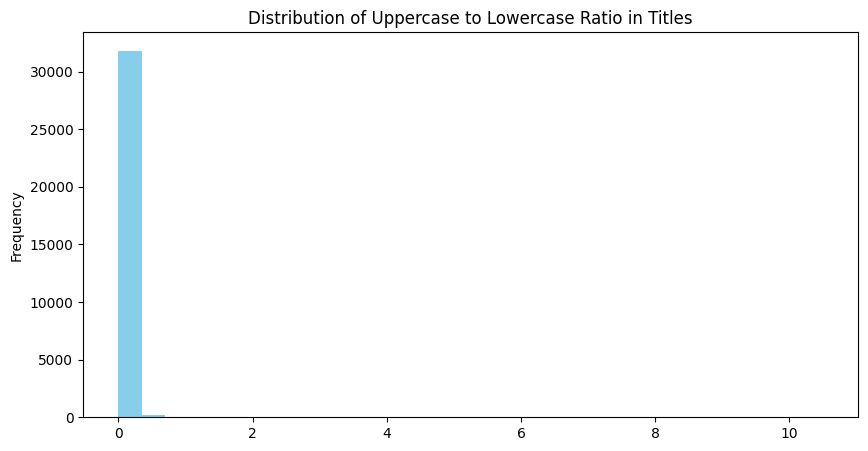

In [ ]:
if 'upper_lower_ratio' not in df.columns:
    df['upper_lower_ratio'] = df['title_uppercase_count'] / (df['title_length'] - df['title_uppercase_count']).replace(0, 1)

df['upper_lower_ratio'].plot(kind='hist', bins=30, figsize=(10, 5), color='skyblue', title='Distribution of Uppercase to Lowercase Ratio in Titles')
df['upper_lower_ratio'].describe()

##### Starts with the Question

starts_with_question
False    29300
True      2700
Name: count, dtype: int64

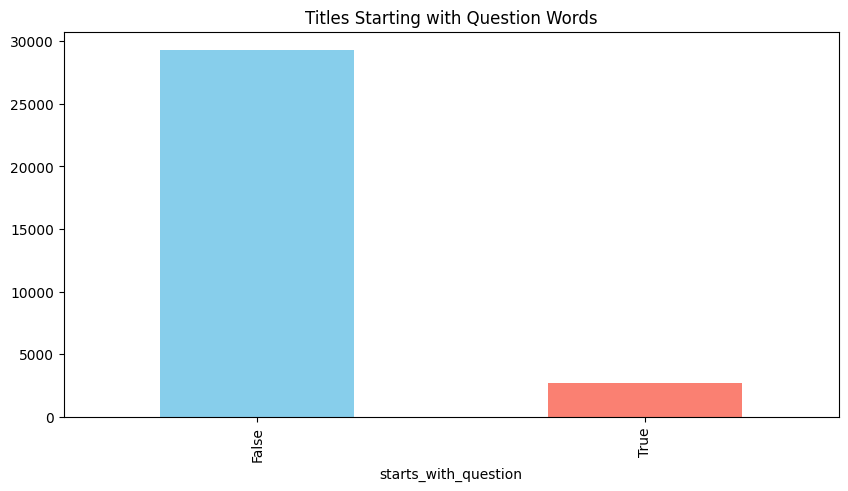

In [32]:
if 'starts_with_question' not in df.columns:
    df['starts_with_question'] = df['title'].str.startswith(('What', 'How', 'Why', 'Is', 'Are', 'Do', 'Does', 'Did', 'Can', 'Could', 'Will', 'Would'))

df['starts_with_question'].value_counts().plot(kind='bar', figsize=(10, 5), color=['skyblue', 'salmon'], title='Titles Starting with Question Words')
df['starts_with_question'].value_counts()

##### Number of Superlatives (Not Useful For This Dataset)

count    32000.000000
mean         0.046938
std          0.214005
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: number_of_superlatives, dtype: float64

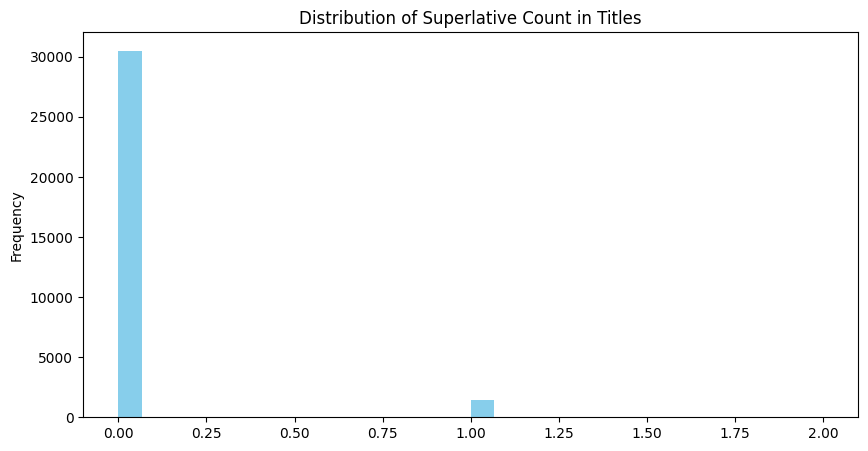

In [24]:
if 'number_of_superlatives' not in df.columns:
    superlatives = ['best', 'worst', 'greatest', 'most', 'least', 'biggest', 'smallest', 'highest', 'lowest', 'top', 'bottom']
    df['number_of_superlatives'] = df['title'].apply(lambda x: sum(1 for word in x.lower().split() if word in superlatives))
    
df['number_of_superlatives'].plot(kind='hist', bins=30, figsize=(10, 5), color='skyblue', title='Distribution of Superlative Count in Titles')
df['number_of_superlatives'].describe()



##### Contains Exclamation (Not Useful For This Dataset)

count     32000
unique        2
top       False
freq      31962
Name: contains_exclamation, dtype: object

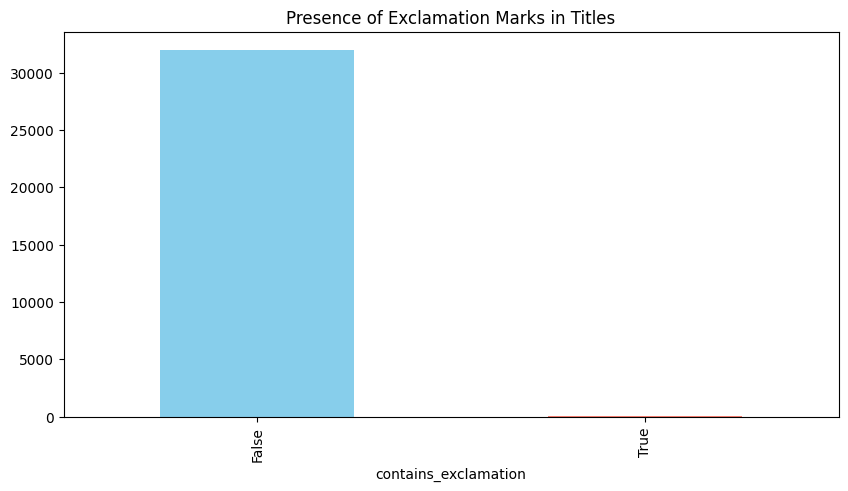

In [31]:
if 'contains_exclamation' not in df.columns:
    df['contains_exclamation'] = df['title'].str.contains('!', case=False, na=False)
    
df['contains_exclamation'].value_counts().plot(kind='bar', figsize=(10, 5), color=['skyblue', 'salmon'], title='Presence of Exclamation Marks in Titles')
df['contains_exclamation'].describe()

##### Contains Question Marks (Not Useful For This Dataset)

count     32000
unique        2
top       False
freq      31840
Name: contains_question_mark, dtype: object

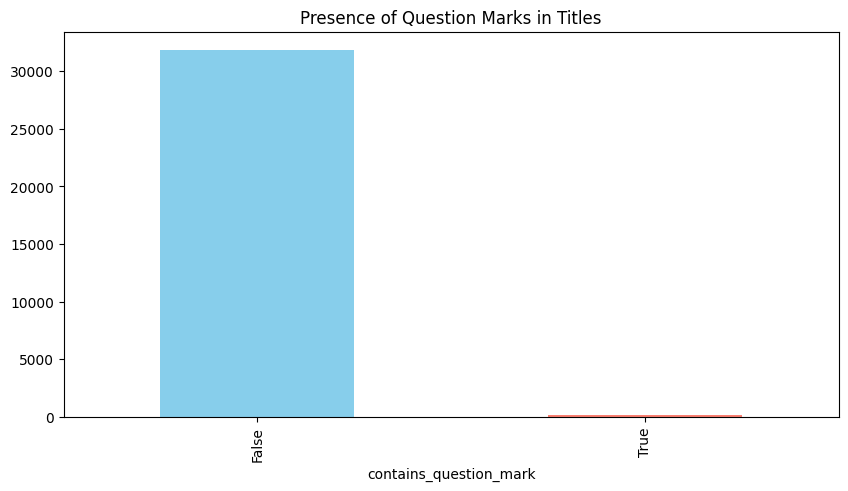

In [30]:
if 'contains_question_mark' not in df.columns:
    df['contains_question_mark'] = df['title'].str.contains('?', case=False, na=False, regex=False)

df['contains_question_mark'].value_counts().plot(kind='bar', figsize=(10, 5), color=['skyblue', 'salmon'], title='Presence of Question Marks in Titles')
df['contains_question_mark'].describe()

##### Contains Quotation Marks (Might Be Useful For This Dataset)

count     32000
unique        2
top       False
freq      29430
Name: contains_quotation, dtype: object

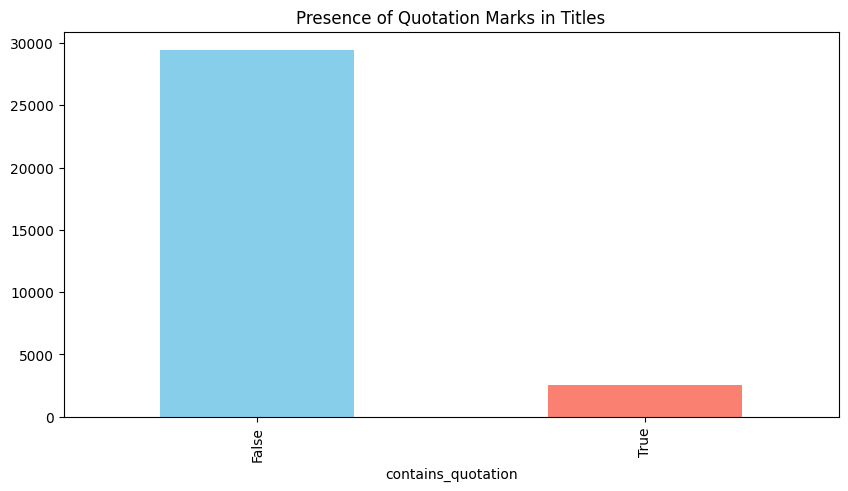

In [34]:
if 'contains_quotation' not in df.columns:
    df['contains_quotation'] = df['title'].str.contains('"', case=False, na=False)
    
df['contains_quotation'].value_counts().plot(kind='bar', figsize=(10, 5), color=['skyblue', 'salmon'], title='Presence of Quotation Marks in Titles')
df['contains_quotation'].describe()

##### Contains Pronoun

count     32000
unique        2
top        True
freq      25077
Name: contains_pronoun, dtype: object

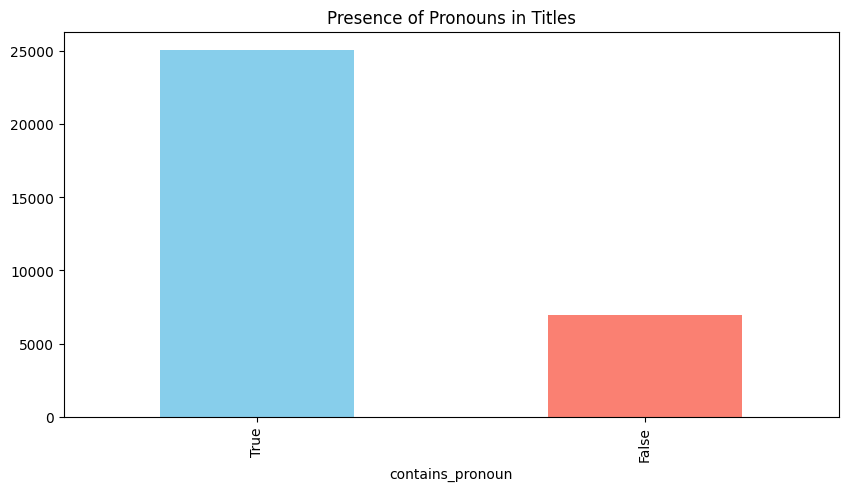

In [35]:
if 'contains_pronoun' not in df.columns:
    pronouns = ['I', 'me', 'my', 'you', 'your', 'he', 'him', 'his', 'she', 'her', 'it', 'its', 'we', 'us', 'our', 'they', 'them', 'their']
    df['contains_pronoun'] = df['title'].apply(lambda x: any(pronoun in x for pronoun in pronouns))

df['contains_pronoun'].value_counts().plot(kind='bar', figsize=(10, 5), color=['skyblue', 'salmon'], title='Presence of Pronouns in Titles')
df['contains_pronoun'].describe()

##### Average Word Length

<bound method NDFrame.describe of 0        6.5556
1        5.5000
2        4.8750
3        4.3636
4        5.4000
          ...  
31995    6.4286
31996    6.2000
31997    4.5000
31998    6.2000
31999    4.8000
Name: average_word_length, Length: 32000, dtype: float64>

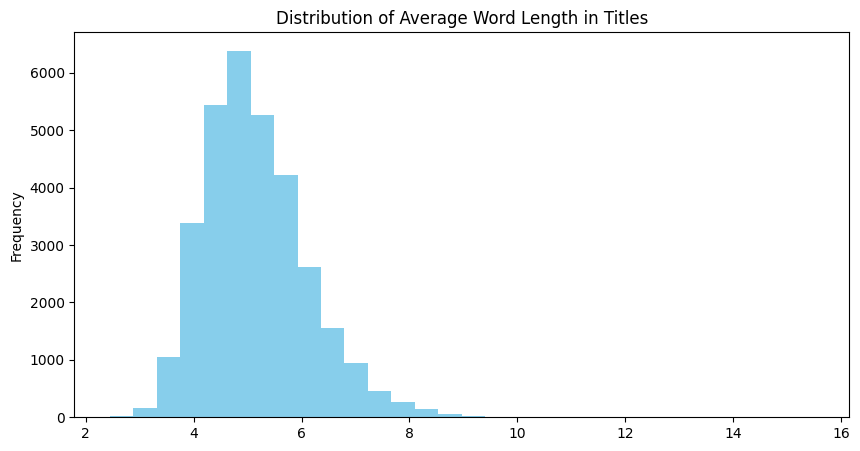

In [64]:
if 'average_word_length' not in df.columns:
    df['average_word_length'] = df['title'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()) if len(x.split()) > 0 else 0)
    df['average_word_length'] = df['average_word_length'].astype(float).round(4)
    
df['average_word_length'].plot(kind='hist', bins=30, figsize=(10, 5), color='skyblue', title='Distribution of Average Word Length in Titles')
df['average_word_length'].describe

In [48]:
# Remove unnecessary columns
if 'upper_lower_ratio' in df.columns:
    del df['upper_lower_ratio']
if 'number_of_superlatives' in df.columns:
    del df['number_of_superlatives']
if 'contains_exclamation' in df.columns:
    del df['contains_exclamation']
if 'contains_question_mark' in df.columns:
    del df['contains_question_mark']


In [37]:
df

,title,clickbait,title_length,title_world_count,title_uppercase_count,number_of_special_characters,number_count,starts_with_question,upper_lower_ratio,number_of_superlatives,contains_exclamation,contains_question_mark,contains_quotation,contains_pronoun,average_word_length
0,""".asia"" domain applications near 300,000 on op...",0,67,9,0,4,6,False,0.000000,0,False,False,True,False,6.555556
1,"""1 Indian + 1 Indian = Unrelatable"": Televisio...",1,64,10,6,6,2,False,0.103448,0,False,False,True,True,5.500000
2,"""7th Heaven"" television series comes to an end",0,46,8,1,2,1,False,0.022222,0,False,False,True,True,4.875000
3,"""Arm Glow"" Is Your New Life Goal, Thanks To Lu...",1,58,11,11,4,0,False,0.234043,0,False,False,True,True,4.363636
4,"""Beans Memes"" Is The Only Twitter Account That...",1,63,10,10,2,0,False,0.188679,0,False,False,True,True,5.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31995,"Íngrid Betancourt and others rescued, says Col...",0,51,7,3,1,0,False,0.062500,0,False,False,False,True,6.428571
31996,Íngrid Betancourt returns to France,0,35,5,3,0,0,False,0.093750,0,False,False,False,True,6.200000
31997,‘Twin Towers’ warship set to enter New York,0,43,8,4,2,0,False,0.102564,0,False,False,False,True,4.500000
31998,"“Dr Death” Steve Williams, American profession...",0,71,10,5,4,2,False,0.075758,0,False,False,False,True,6.200000
